<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data(y_hat)_add_delta_(_0_8)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_-0.8'

In [4]:
os.listdir(base_path)

['data_add_delta_-0.8_n20.csv',
 'data_add_delta_-0.8_n250.csv',
 'data_add_delta_-0.8_n120.csv',
 'data_add_delta_-0.8_n60.csv',
 'data_add_delta_-0.8_n30.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-0.8_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,53.262948,98.080266,38.860777,-0.040688,200.163303,200.160214,0.003089
1,0.0,1.0,20.023147,36.471332,80.327226,0.158435,146.980141,146.889803,0.090338
2,0.0,2.0,59.988586,99.689539,45.833488,-0.174764,215.336849,215.455799,-0.118950
3,0.0,3.0,96.002275,47.527576,95.837595,-0.247078,249.120369,249.347164,-0.226795
4,0.0,4.0,45.237584,54.645970,93.111254,-0.337769,202.657039,203.003806,-0.346767
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,31.877837,86.647545,53.511399,0.129948,182.166729,182.019612,0.147117
59996,999.0,56.0,20.784740,25.113350,67.455395,-0.054364,123.299121,123.469285,-0.170164
59997,999.0,57.0,65.268124,62.453344,28.079800,0.169637,165.970905,165.858060,0.112845
59998,999.0,58.0,43.411422,22.607025,23.333061,0.421564,99.773072,99.531066,0.242007


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,53.262948,98.080266,38.860777,-0.040688,200.163303,200.160214,0.003089
1,0.0,1.0,20.023147,36.471332,80.327226,0.158435,146.980141,146.889803,0.090338
2,0.0,2.0,59.988586,99.689539,45.833488,-0.174764,215.336849,215.455799,-0.118950
3,0.0,3.0,96.002275,47.527576,95.837595,-0.247078,249.120369,249.347164,-0.226795
4,0.0,4.0,45.237584,54.645970,93.111254,-0.337769,202.657039,203.003806,-0.346767
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,31.877837,86.647545,53.511399,0.129948,182.166729,182.019612,0.147117
59996,999.0,56.0,20.784740,25.113350,67.455395,-0.054364,123.299121,123.469285,-0.170164
59997,999.0,57.0,65.268124,62.453344,28.079800,0.169637,165.970905,165.858060,0.112845
59998,999.0,58.0,43.411422,22.607025,23.333061,0.421564,99.773072,99.531066,0.242007


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    53.262948  98.080266  38.860777 -0.040688  200.163303   
      1.0    20.023147  36.471332  80.327226  0.158435  146.980141   
      2.0    59.988586  99.689539  45.833488 -0.174764  215.336849   
      3.0    96.002275  47.527576  95.837595 -0.247078  249.120369   
      4.0    45.237584  54.645970  93.111254 -0.337769  202.657039   
...                ...        ...        ...       ...         ...   
999.0 55.0   31.877837  86.647545  53.511399  0.129948  182.166729   
      56.0   20.784740  25.113350  67.455395 -0.054364  123.299121   
      57.0   65.268124  62.453344  28.079800  0.169637  165.970905   
      58.0   43.411422  22.607025  23.333061  0.421564   99.773072   
      59.0   67.126956  25.705038  89.007489 -0.051218  191.788266   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    200.160214  0.003089  
      1.0    146.889803  0.090338  
      2.0    215.455799 -0.118950  
      3.0    249.347164 -0.226795  
      4.0    203.003806 -0.346767  
...                 ...       ...  
999.0 55.0   182.019612  0.147117  
      56.0   123.469285 -0.170164  
      57.0   165.858060  0.112845  
      58.0    99.531066  0.242007  
      59.0   191.876460 -0.088194  

[60000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    53.262948  98.080266  38.860777 -0.040688  200.163303   
      1.0    20.023147  36.471332  80.327226  0.158435  146.980141   
      2.0    59.988586  99.689539  45.833488 -0.174764  215.336849   
      3.0    96.002275  47.527576  95.837595 -0.247078  249.120369   
      4.0    45.237584  54.645970  93.111254 -0.337769  202.657039   
...                ...        ...        ...       ...         ...   
999.0 55.0   31.877837  86.647545  53.511399  0.129948  182.166729   
      56.0   20.784740  25.113350  67.455395 -0.054364  123.299121   
      57.0   65.268124  62.453344  28.079800  0.169637  165.970905   
      58.0   43.411422  22.607025  23.333061  0.421564   99.773072   
      59.0   67.126956  25.705038  89.007489 -0.051218  191.788266   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    200.160214  0.003089  
      1.0    146.889803  0.090338  
      2.0    215.455799 -0.118950  
      3.0    249.347164 -0.226795  
      4.0    203.003806 -0.346767  
...                 ...       ...  
999.0 55.0   182.019612  0.147117  
      56.0   123.469285 -0.170164  
      57.0   165.858060  0.112845  
      58.0    99.531066  0.242007  
      59.0   191.876460 -0.088194  

[60000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,53.262948,98.080266,38.860777,-0.040688,200.163303,200.160214,0.003089
1,0.0,1.0,20.023147,36.471332,80.327226,0.158435,146.980141,146.889803,0.090338
2,0.0,2.0,59.988586,99.689539,45.833488,-0.174764,215.336849,215.455799,-0.118950
3,0.0,3.0,96.002275,47.527576,95.837595,-0.247078,249.120369,249.347164,-0.226795
4,0.0,4.0,45.237584,54.645970,93.111254,-0.337769,202.657039,203.003806,-0.346767
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,31.877837,86.647545,53.511399,0.129948,182.166729,182.019612,0.147117
59996,999.0,56.0,20.784740,25.113350,67.455395,-0.054364,123.299121,123.469285,-0.170164
59997,999.0,57.0,65.268124,62.453344,28.079800,0.169637,165.970905,165.858060,0.112845
59998,999.0,58.0,43.411422,22.607025,23.333061,0.421564,99.773072,99.531066,0.242007


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    53.262948  98.080266  38.860777 -0.040688  200.163303   
      1.0    20.023147  36.471332  80.327226  0.158435  146.980141   
      2.0    59.988586  99.689539  45.833488 -0.174764  215.336849   
      3.0    96.002275  47.527576  95.837595 -0.247078  249.120369   
      4.0    45.237584  54.645970  93.111254 -0.337769  202.657039   
...                ...        ...        ...       ...         ...   
999.0 55.0   31.877837  86.647545  53.511399  0.129948  182.166729   
      56.0   20.784740  25.113350  67.455395 -0.054364  123.299121   
      57.0   65.268124  62.453344  28.079800  0.169637  165.970905   
      58.0   43.411422  22.607025  23.333061  0.421564   99.773072   
      59.0   67.126956  25.705038  89.007489 -0.051218  191.788266   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    200.160214  0.003089  
      1.0    146.889803  0.090338  
      2.0    215.455799 -0.118950  
      3.0    249.347164 -0.226795  
      4.0    203.003806 -0.346767  
...                 ...       ...  
999.0 55.0   182.019612  0.147117  
      56.0   123.469285 -0.170164  
      57.0   165.858060  0.112845  
      58.0    99.531066  0.242007  
      59.0   191.876460 -0.088194  

[60000 rows x 7 columns]

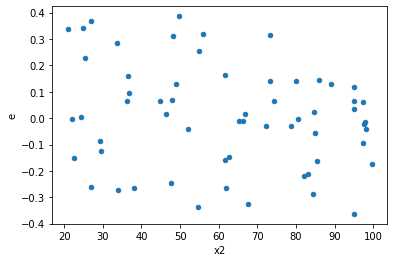

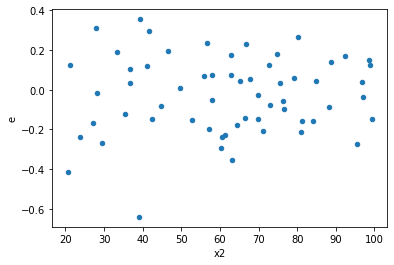

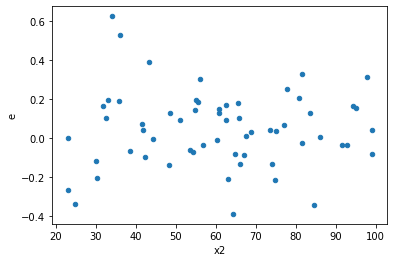

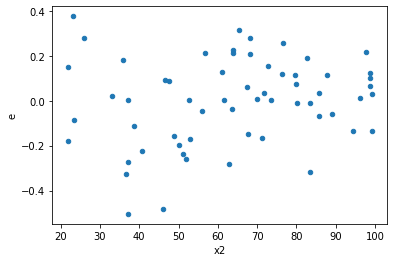

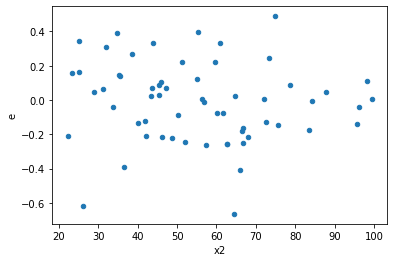

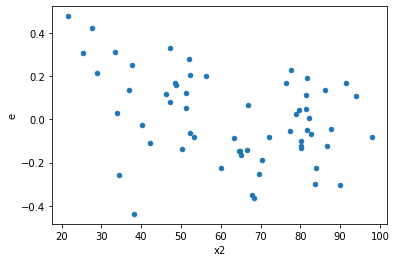

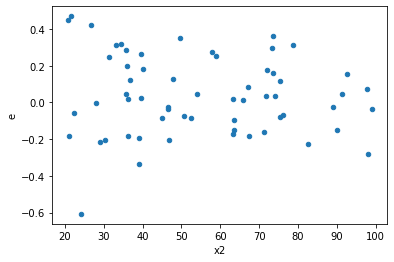

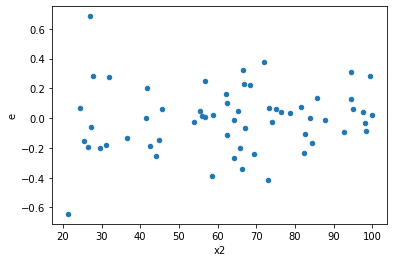

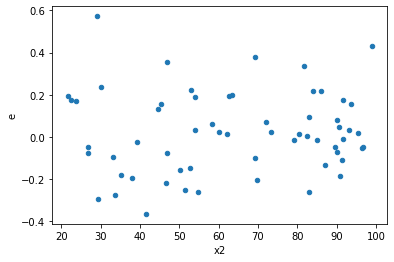

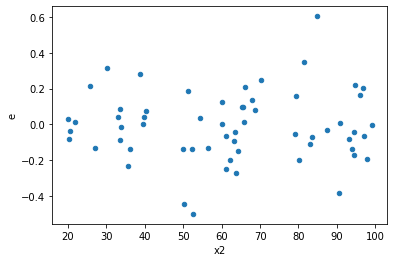

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)

    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,21.0,21.0,0.6698033975742779,0.8470878551420373,0.031895399884489424,0.04033751691152559,1.2646813351646211,0.5953673097283432,0.7023163451358284,0.2976836548641716,Reject005=1 : Homoscedasticity
2.0,21.0,21.0,0.5703263315068031,0.7375170177926654,0.027158396738419195,0.03511985799012692,1.2931491622421574,0.5610461656422405,0.7194769171788797,0.28052308282112026,Reject005=1 : Homoscedasticity
12.0,21.0,21.0,0.6491823779916674,0.9804303326373739,0.03091344657103178,0.046687158697017804,1.5102540763205348,0.352247900065366,0.823876049967317,0.176123950032683,Reject005=1 : Homoscedasticity
17.0,21.0,21.0,0.6263029557307306,1.051500387868248,0.029823950272891933,0.05007144704134515,1.6789005676037791,0.24330089221683604,0.878349553891582,0.12165044610841802,Reject005=1 : Homoscedasticity
23.0,21.0,21.0,0.8736176722489408,1.1888233762211022,0.041600841535663846,0.05661063696290963,1.3608050912714853,0.48631224175106147,0.7568438791244693,0.24315612087553073,Reject005=1 : Homoscedasticity
35.0,21.0,21.0,0.7044149401080715,1.088970276400155,0.03354356857657483,0.051855727447626426,1.5459216072746624,0.32584749294646587,0.8370762535267671,0.16292374647323293,Reject005=1 : Homoscedasticity
43.0,21.0,21.0,0.5239952470861403,0.7241230319952822,0.02495215462314954,0.03448204914263248,1.3819267178891845,0.46487272727895834,0.7675636363605208,0.23243636363947917,Reject005=1 : Homoscedasticity
44.0,21.0,21.0,0.5103186059260841,0.7759848831240204,0.024300885996480198,0.036951661101143826,1.5205890479259068,0.3443948387232141,0.827802580638393,0.17219741936160704,Reject005=1 : Homoscedasticity
46.0,21.0,21.0,0.7419363811985051,0.7927045811746399,0.03533030386659548,0.03774783719879238,1.0684266215576665,0.8808859511246352,0.5595570244376824,0.4404429755623176,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,21.0,21.0,0.97345800624528,0.6845883591371209,0.04635514315453714,0.03259944567319623,0.7032541257507792,0.42658030260041213,Reject005=1 : Homoscedasticity
1.0,21.0,21.0,0.6698033975742779,0.8470878551420373,0.031895399884489424,0.04033751691152559,1.2646813351646211,0.5953673097283432,Reject005=1 : Homoscedasticity
2.0,21.0,21.0,0.5703263315068031,0.7375170177926654,0.027158396738419195,0.03511985799012692,1.2931491622421574,0.5610461656422405,Reject005=1 : Homoscedasticity
3.0,21.0,21.0,1.063184951094583,0.5280039742645017,0.05062785481402776,0.025143046393547704,0.49662476290781277,0.11660225493247645,Reject005=1 : Homoscedasticity
4.0,21.0,21.0,1.157789594512526,0.8818669842530225,0.05513283783392981,0.04199366591681059,0.7616815597866229,0.5382676032405275,Reject005=1 : Homoscedasticity
5.0,21.0,21.0,0.9398230215070803,0.6050971466884824,0.044753477214622875,0.028814149842308685,0.6438415880876821,0.32071450321639294,Reject005=1 : Homoscedasticity
6.0,21.0,21.0,1.2021592853707141,0.933098493190845,0.05724568025574829,0.04443326158051643,0.7761854061652921,0.566707737992419,Reject005=1 : Homoscedasticity
7.0,21.0,21.0,1.3735841565839395,0.6407244447362873,0.06540876936113997,0.030510687844585112,0.4664617320061036,0.08789566252577666,Reject005=1 : Homoscedasticity
8.0,21.0,21.0,1.1815518092075725,0.666381996738477,0.05626437186702726,0.03173247603516557,0.5639888082312676,0.19769415599882004,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      843
Reject005=0 : Heteroscedasticity    157
Name: Result_test, dtype: int64